In [26]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(city_df,ride_df, on='city')

# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [27]:
#Group the data by city and get the total number of rides, average_fare, city type and driver count per city 
bubplotdata_df = combined_df.groupby('city').agg({
     'ride_id':'nunique',
     'fare':'mean',
     'type':'max',
     'driver_count':'max'
 })
bubplotdata_df = bubplotdata_df.rename(columns = {'ride_id':'total_rides','fare':'average_fare'})
bubplotdata_df.head()

,total_rides,average_fare,type,driver_count
city,,,,
Amandaburgh,18,24.641667,Urban,12
Barajasview,22,25.332273,Urban,26
Barronchester,16,36.422500,Suburban,11
Bethanyland,18,32.956111,Suburban,22
Bradshawfurt,10,40.064000,Rural,7


## Bubble Plot of Ride Sharing Data

<function matplotlib.pyplot.show(*args, **kw)>

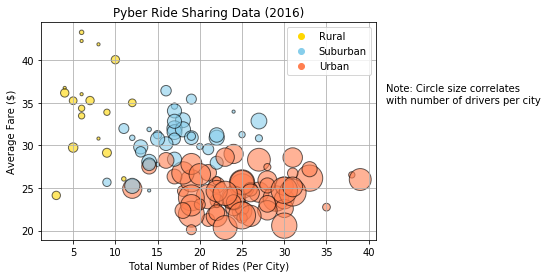

In [28]:
#Set up Bubble Plot

#Dictionary for Bubble color
landuse_to_color = {
    'Rural':'gold',
    'Suburban':'skyblue',
    'Urban':'coral'
}

#Function that sets the color
def colors(type_of_use):
     return landuse_to_color.get(type_of_use, "blue")

#Set up scatter plot    
pyber_scatter = bubplotdata_df.plot(kind = 'scatter', x = 'total_rides', y = 'average_fare', grid = True, 
                                    c = bubplotdata_df['type'].map(colors), s = bubplotdata_df['driver_count']*10,
                                    alpha = 0.6, edgecolors = 'black', title = 'Pyber Ride Sharing Data (2016)')

#Bubble Plot Axes Labels
plt.xlabel('Total Number of Rides (Per City)') 
plt.ylabel('Average Fare ($)')
plt.text(42, 35,'Note: Circle size correlates \nwith number of drivers per city')

#Legend
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in landuse_to_color.values()]
plt.legend(markers, landuse_to_color.keys(), numpoints=1)

plt.show



In [29]:
# Show plot
plt.show()

## Total Fares by City Type

In [30]:
total_fares = combined_df.groupby('type').agg({
    'fare': 'sum'
})
total_fares

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


Text(0.5, 1.0, '% of Total Fares by City Type')

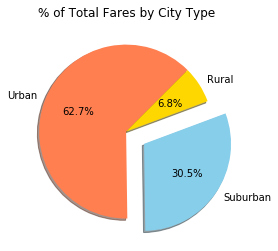

In [31]:
# Calculate Fares Percents
rural_percent_tf = total_fares['fare']['Rural']/total_fares['fare'].sum()
suburban_percent_tf = total_fares['fare']['Suburban']/total_fares['fare'].sum()
urban_percent_tf = total_fares['fare']['Urban']/total_fares['fare'].sum()

# Build Pie Chart
labels = ['Urban', 'Suburban', 'Rural']
sizes = [urban_percent_tf, suburban_percent_tf, rural_percent_tf]
colors = ['coral', 'skyblue', 'gold']
explode = (0, .25, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
plt.title('% of Total Fares by City Type')
# Save Figure




In [32]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5, 1.0, '% of Total Rides by City Type')

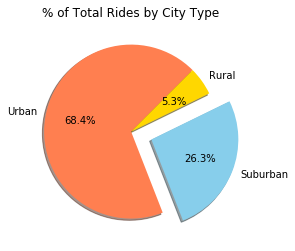

In [33]:
# Calculate Type Percents
total_rides = combined_df['ride_id'].count() 
urban_percent_tr = combined_df['type'].value_counts()['Urban']/total_rides
suburban_percent_tr = combined_df['type'].value_counts()['Suburban']/total_rides
rural_percent_tr = combined_df['type'].value_counts()['Rural']/total_rides

# Build Pie Chart
labels = ['Urban', 'Suburban', 'Rural']
sizes = [urban_percent_tr, suburban_percent_tr, rural_percent_tr]
colors = ['coral', 'skyblue', 'gold']
explode = (0, .25, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
plt.title('% of Total Rides by City Type')
# Save Figure

In [34]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5, 1.0, '% of Total Drivers By City Type')

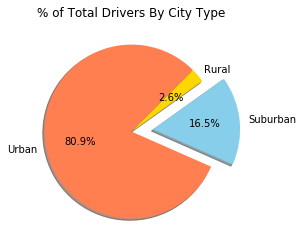

In [35]:
# Calculate Driver Percents
total_drivers_dict = bubplotdata_df.groupby('type').agg({
    'driver_count': 'sum'
}).to_dict()

total_drivers = total_drivers_dict['driver_count']['Rural']+total_drivers_dict['driver_count']['Suburban']+total_drivers_dict['driver_count']['Urban']
rural_percent_ct = total_drivers_dict['driver_count']['Rural']/total_drivers*100
suburban_percent_ct = total_drivers_dict['driver_count']['Suburban']/total_drivers*100
urban_percent_ct = total_drivers_dict['driver_count']['Urban']/total_drivers*100

# Build Pie Charts
labels = ['Urban', 'Suburban', 'Rural']
sizes = [urban_percent_ct, suburban_percent_ct, rural_percent_ct]
colors = ['coral', 'skyblue', 'gold']
explode = (0, .25, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
plt.title('% of Total Drivers By City Type')

# Save Figure


In [36]:
# Show Figure
plt.show()